# Get feature importance / SHAP values

In [11]:
import numpy as np
import pandas as pd
import shap
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as pl
import ml_help
from time import time
import seaborn as sns
sns.set_theme()

In [12]:
df = pd.read_csv("./data/yonge_count_weather_incidents.csv.zip")
df

,total_count,Dist. Mid. Point,North of Mid. Point,Hour,Minute,Mag. of Delay,Length,Delay,Visibility,Temperature,...,Tuesday,Wednesday,Backed up traffic,Demonstration,No incidents,Obst. on the road,Roadworks,Slow traffic,Stopped traffic,Two lanes closed
0,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,0.69,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,-2.94,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,984.0,3.499076,1.0,7.0,45.0,0.0,0.0,0.0,10.0,4.29,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1046.0,3.499076,1.0,8.0,0.0,0.0,0.0,0.0,10.0,0.66,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1046.0,3.499076,1.0,8.0,0.0,0.0,0.0,0.0,10.0,-3.03,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20118,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,24.89,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20119,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,25.28,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20120,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,24.88,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20121,401.0,0.243920,1.0,18.0,0.0,0.0,0.0,0.0,10.0,27.84,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X = df.drop("total_count",axis=1)
y = df["total_count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.80 = 0.20

# XGBoost

In [14]:
import xgboost as xgb

params = ml_help.params_to_dict("153_xgboost")
params

{'alpha': 1,
 'learning_rate': 0.3,
 'max_depth': 16,
 'max_leaves': 40,
 'n_estimators': 100,
 'num_parallel_tree': 10,
 'objective': 'reg:squarederror',
 'predictor': 'gpu_predictor',
 'random_state': 42,
 'tree_method': 'gpu_hist'}

Fitting...
Fitting... OK! Took 2.2145731449127197 seconds
Explaining...
Explaining... OK! Took 0.9353208541870117 seconds
Calculating shap values...


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Calculating shap values... OK! Took 2.058110237121582 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


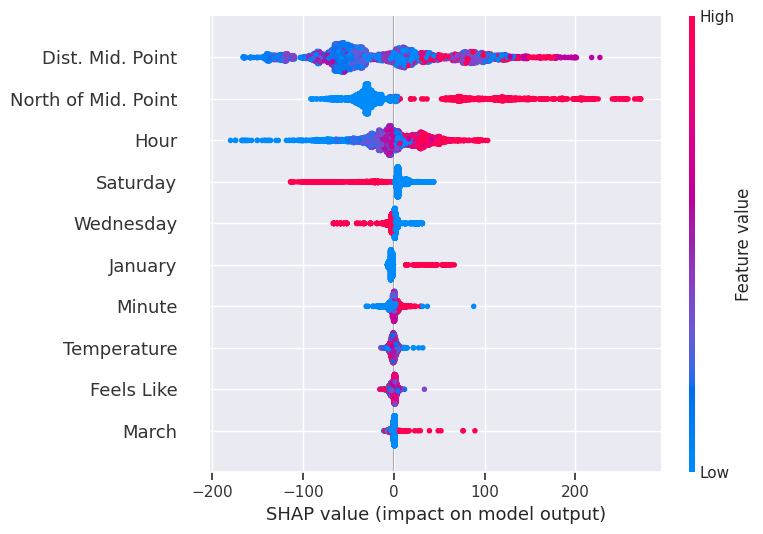

In [15]:
params["predictor"] = "cpu_predictor"
params["tree_method"] = "hist"

model = xgb.XGBRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
xgboost_fig = pl.gcf()
pl.savefig("./plots/156_xgboost.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/156_xgboost.png", bbox_inches="tight")
pl.savefig("./plots/156_xgboost.pdf", bbox_inches="tight")

# Random Forest

Fitting...
Fitting... OK! Took 6.989486932754517 seconds
Explaining...
Explaining... OK! Took 0.00913238525390625 seconds
Calculating shap values...
Calculating shap values... OK! Took 11.341405391693115 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


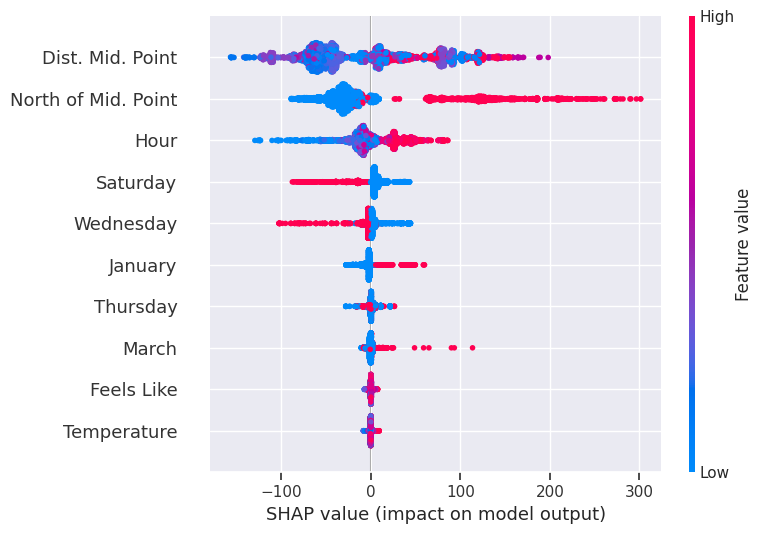

In [17]:
from sklearn.ensemble import RandomForestRegressor

params = ml_help.params_to_dict("153_random_forest")
model = RandomForestRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/156_random_forest.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/156_random_forest.png", bbox_inches="tight")
pl.savefig("./plots/156_random_forest.pdf", bbox_inches="tight")

# Decision Tree

Fitting...
Fitting... OK! Took 0.04446077346801758 seconds
Explaining...
Explaining... OK! Took 0.0009148120880126953 seconds
Calculating shap values...
Calculating shap values... OK! Took 0.03813433647155762 seconds


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


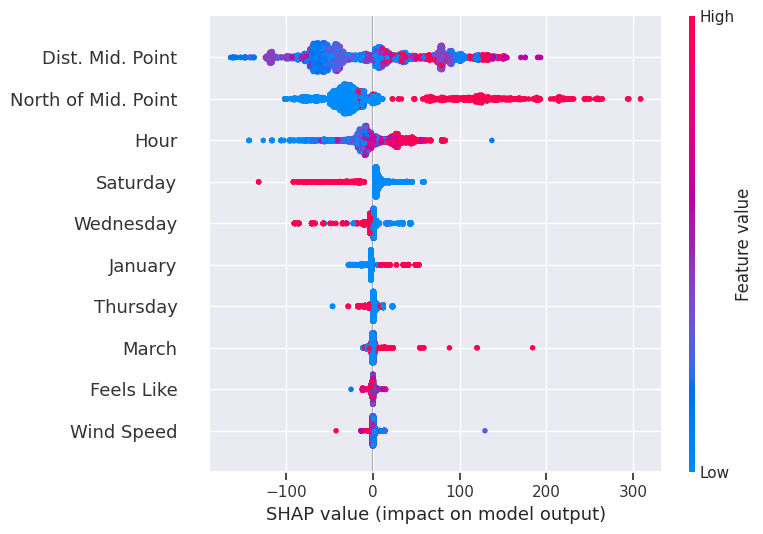

In [18]:
from sklearn.tree import DecisionTreeRegressor

params = ml_help.params_to_dict("153_decision_tree")
model = DecisionTreeRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.TreeExplainer(model)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/156_decision_tree.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/156_decision_tree.png", bbox_inches="tight")
pl.savefig("./plots/156_decision_tree.pdf", bbox_inches="tight")

# MLP

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


Fitting...


X does not have valid feature names, but MLPRegressor was fitted with feature names


Fitting... OK! Took 30.997554779052734 seconds
Explaining...
Explaining... OK! Took 0.0007557868957519531 seconds
Calculating shap values...


100%|███████████████████████████████████████| 4025/4025 [18:07<00:00,  3.70it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


Calculating shap values... OK! Took 1087.6908886432648 seconds


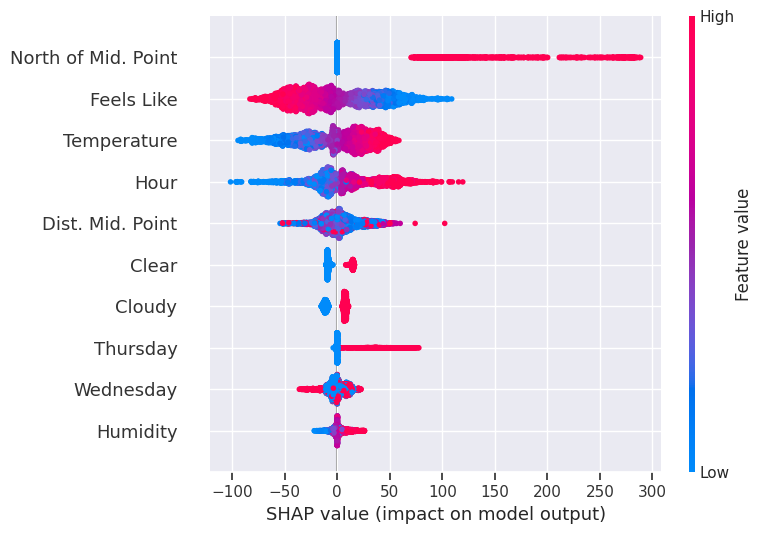

In [19]:
from sklearn.neural_network import MLPRegressor
import warnings

X_train_summary = shap.kmeans(X_train, 10)

params = ml_help.params_to_dict("153_mlpr")
model = MLPRegressor(**params)

print("Fitting...")
start = time()
model.fit(X_train, y_train)
end = time()
print(f"Fitting... OK! Took {end - start} seconds")

print("Explaining...")
start = time()
explainer = shap.KernelExplainer(model.predict, X_train_summary)
end = time()
print(f"Explaining... OK! Took {end - start} seconds")

print("Calculating shap values...")
start = time()
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    shap_values = explainer.shap_values(X_test)
end = time()
print(f"Calculating shap values... OK! Took {end - start} seconds")

shap.summary_plot(shap_values, X_test, max_display=10, show=False)
pl.savefig("./plots/156_mlp.eps", format="eps", bbox_inches="tight")
pl.savefig("./plots/156_mlp.png", bbox_inches="tight")
pl.savefig("./plots/156_mlp.pdf", bbox_inches="tight")